In [1]:
import chem_ocean.ocean_plt as oc_plt
import chem_ocean.ocean_analysis as oc_an

from chem_ocean import ocean_data as oc_data
from chem_ocean.ocean_plt_util import make_section, subplot_labels, save_name

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from scipy import stats
title_sz = 27
axis_sz = 22
tick_sz = 21

%matplotlib inline

In [3]:
path = 'raw_demo_plots/'

In [4]:
minlat, minlon = -40, -30
_x, _y, _d, _feat_data, _basemap, _xLab, _yLab, _latLon_params = oc_data.get_column([minlat, minlat+2], [minlon, minlon+2], ['nitrate'])

0.23725008964538574


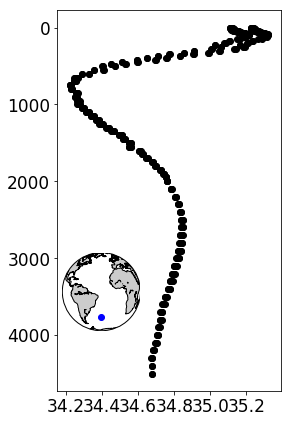

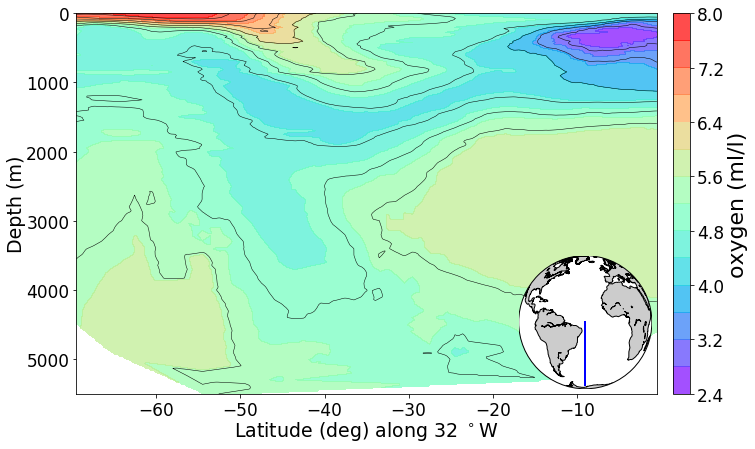

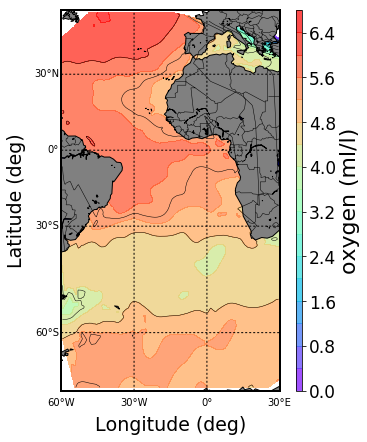

In [10]:
minlat, minlon = -40, -30
fig, (ax1) = oc_plt.plotRaw(minlat, minlat+2, minlon, minlon+2, ['salinity'], 'column')
# plt.savefig(path+'nitrate_column_40s30w.png', dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None)

fig, (ax1) = oc_plt.plotRaw(-70, 0, -32, -32, ['oxygen'], 'NS_section')
# plt.savefig(path+'nitrate_section_70-0s32w.png', dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None)

fig, (ax1) = oc_plt.plotRaw(-90, 90, -180, 180, ['phostphate'], 'plan', depth = 25, plot_pt = (68.5, -99.5)
# plt.savefig(path+'nitrate_plan_70s-50n_60w-30e_2000m.png', dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None)

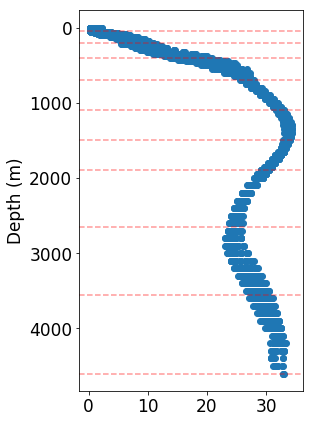

In [4]:
_x, _y, _d, _feat_data, _basemap, _xLab, _yLab, _latLon_params = oc_data.get_column([-40, -35], [-30, -25], ['nitrate'])
intervals, fig, ax =oc_an.column_split_ptest(_feat_data, _d)

In [6]:
ptlat = -43.5
ptlon = -32

tracer = 'salinity'
minlat, maxlat, minlon, maxlon = -70, 0, -32, -32
slice_type = 'NS_section'
dpth = 1950

0.10109210014343262


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


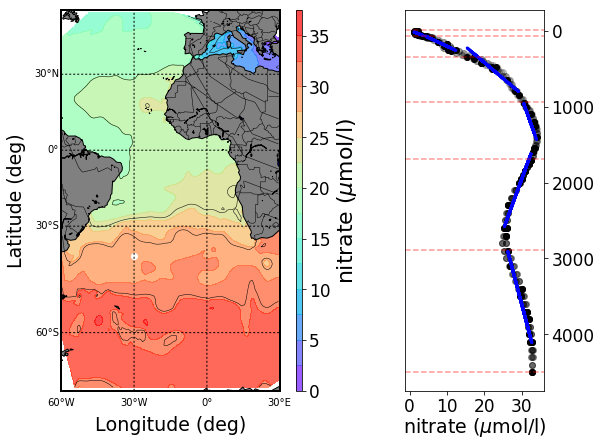

In [10]:
fig, (ax1, ax2) = oc_plt.plotRaw(-70, 50, -60, 30, ['nitrate'], 'plan', depth = 2000, add_profile = True, plot_pt = (minlat, minlon))
intervals, fig, ax2 = oc_an.column_split_byslope(_feat_data, _d, exist_plt = (fig, ax2))#, depth_lim = (min(_d), max(_d)))

In [6]:
ptlat = 43.5
ptlon = 39.5

tracer = 'phosphate'
minlat, maxlat, minlon, maxlon = -70, 70,-180, 180
slice_type = 'plan'
dpth = 1950

0.4293389320373535


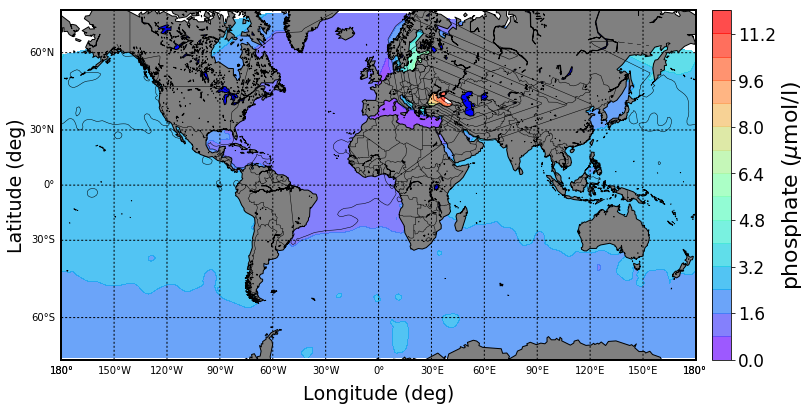

In [5]:
name1 = save_name(tracer, slice_type, minlat, maxlat, minlon, maxlon, depth = dpth)

fig, (ax1) = oc_plt.plotRaw(minlat, maxlat, minlon, maxlon, [tracer], slice_type, depth = dpth, plot_pt = (ptlat, ptlon))

plt.savefig(path+name1+'.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

print(name1)

The work below is to alter plot_raw to accomodate 2 figures more generically

In [4]:
from matplotlib.mlab import griddata
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams

import numpy as np

from mpl_toolkits.basemap import Basemap, shiftgrid
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

title_sz = 27
axis_sz = 22
tick_sz = 21

import chem_ocean.ocean_data as oc_data

rcParams.update({'font.size': tick_sz-4}) # Increase font-size
# from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.cm as cm

from mpl_toolkits.basemap import Basemap, shiftgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import numpy as np
from numpy import linspace
from numpy import meshgrid

import pylab as pl
from collections import defaultdict

import chem_ocean.Build_Map as bm
from chem_ocean.ocean_plt_util import make_section, subplot_labels

In [5]:
def make_depthprofile(ax, _colors, _x, _y, _lonLat_params, model_raw):
    corner = 4
    if model_raw == 'model':
        for im in range(len(_x)):
            ax.plot(_x[im], _y[im], c = _colors[im], marker = 'o', markersize=15, alpha = .1)
    elif model_raw == 'column':
        corner = 3

    ax.invert_yaxis()
    
    axin = inset_axes(ax, width="35%", height="35%", loc=corner)
    inmap = Basemap(projection='ortho', lon_0=np.mean(_lonLat_params[0]), lat_0=0, ax=axin, anchor='NE')
    inmap.fillcontinents()
    inmap.drawcoastlines(color='k')
    if model_raw == 'column':  
        inmap.scatter(_lonLat_params[0], _lonLat_params[1], color ='b' , latlon=True)  
    else:
        inmap.plot(_lonLat_params[0], _lonLat_params[1], '-b', linewidth=2 , latlon=True) 
    return ax



In [6]:
import sqlalchemy
from collections import defaultdict

In [103]:
class getData():
    
    def __init__(self):
        self._x = None
        self._y = None
        self._d = None
        self._feat_data = None
        self.cluster_d = None
        self._xLab = None
        self._yLab = None
        self._lonLat_params = None
        
    
    def connect(self, user, password, db, host='localhost', port=5432):
        '''Returns a connection and a metadata object'''
        url  = 'postgresql://{}:{}@{}:{}/{}'
        url = url.format(user, password, host, port, db)

        # The return value of create_engine() is our connection object
        con = sqlalchemy.create_engine(url, client_encoding='utf8')

        # We then bind the connection to MetaData()
        meta = sqlalchemy.MetaData(bind=con, reflect=True)

        return con, meta, url
    
    def return_from_psql(self, query, cols, _in_var_names, _x_var, _y_var, **kwargs):
        conn, meta, url = self.connect('jlanders', '', 'odv_app_dev', host='localhost', port=5432)
        result = conn.execute(query)
        print(_in_var_names)
        print(cols)
        print(_in_var_names)

        cluster_d = defaultdict(list)
        for row in result:
            for ik, col in enumerate(cols):
                cluster_d[col].append(row[ik])
        _x = np.asarray(cluster_d[_x_var])
        _y = np.asarray(cluster_d[_y_var])
        _d = np.asarray(cluster_d['depth'])

        _feat_data = np.zeros((len(_x), len(_in_var_names))) 
        for ik, name in enumerate(_in_var_names):
            _feat_data[:, ik] = np.asarray(cluster_d[name])

        mask = np.all(np.isnan(_feat_data), axis=1)
        self._x = _x[~mask]
        self._y = _y[~mask]
        self._d = _d[~mask]
        _feat_data = _feat_data[~mask]
        self._feat_data = np.array([_feat_data[ik][0] for ik in range(len(_feat_data))])
        self.cluster_d = cluster_d
        self._xLab = _x_var
        self._yLab = _y_var

#         return cluster_d, _feat_data, _x, _y, _d
    
    def get_plan(self, lat_bounds, lon_bounds, _var_names, depth):
        sum_names = ['station', 'longitude', 'latitude', 'depth'] + _var_names
        cols = ', '.join(sum_names)
        query = "select "+ cols+ " from woa13 where latitude> {} AND latitude< {} AND longitude>{} and longitude<{} and depth={};".format(str(lat_bounds[0]), str(lat_bounds[1]), str(lon_bounds[0]), str(lon_bounds[1]), str(depth))

        _x_var = 'longitude'
        _y_var = 'latitude'

        self.return_from_psql(query, sum_names, _var_names, _x_var, _y_var)
        self._lonLat_params = None
        self._xLab = _x_var.title()+' (deg)'
        self._yLab = _y_var.title()+' (deg)'

    
    def get_section(self, traj_type, line, limits, _var_names):
        sum_names = ['station', 'longitude', 'latitude', 'depth'] + _var_names
        cols = ', '.join(sum_names)
        traj_bounds = (line-1.5, line+1.5)

        if traj_type == 'EW_section':
            query = "select "+ cols+ " from woa13 where latitude> {} AND latitude< {} AND longitude>{} and longitude<{};".format(str(traj_bounds[0]), str(traj_bounds[1]), str(limits[0]), str(limits[1]))

            _x_var = 'longitude'
            _y_var = 'depth'

            self.return_from_psql(query, sum_names, _var_names, _x_var, _y_var)
            self._yLab = 'Depth (m))'  
            self._xLab = 'Longitude (deg) along '+ r'%s $^\circ$' % abs(line)+ ['S' if lat<0 else 'N' for lat in [line]][0]
            self._lonLat_params = (limits, (line, line))

        if traj_type == 'NS_section':
            query = "select "+ cols+ " from woa13 where latitude> {} AND latitude< {} AND longitude>{} and longitude<{};".format(str(limits[0]), str(limits[1]), str(traj_bounds[0]), str(traj_bounds[1]))

            _x_var = 'latitude'
            _y_var = 'depth'

            self.return_from_psql(query, sum_names, _var_names, _x_var, _y_var)
            self._yLab = 'Depth (m)'  
            self._xLab = 'Latitude (deg) along '+ r'%s $^\circ$' % abs(line)+ ['W' if lon<0 else 'E' for lon in [line]][0]
            self._lonLat_params = ((line, line), limits)

    
    def get_column(self, lat_bounds, lon_bounds, _var_names):
        sum_names = ['station', 'longitude', 'latitude', 'depth'] + _var_names
        cols = ', '.join(sum_names)
        query = "select "+ cols+ " from woa13 where latitude> {} AND latitude< {} AND longitude>{} and longitude<{} order by depth;".format(str(lat_bounds[0]), str(lat_bounds[1]), str(lon_bounds[0]), str(lon_bounds[1]))
        print(query)
        
        _x_var = 'longitude'
        _y_var = 'latitude'

        self.return_from_psql(query, sum_names, _var_names, _x_var, _y_var)
        self._lonLat_params = [lon_bounds, lat_bounds]#None
        self._xLab = _x_var.title()+' (deg)'
        self._yLab = _y_var.title()+' (deg)'


In [8]:
class plotRaw():
    
    gs_d = {'section':3, 'plan':2, 'column':1}
    units_dict = {'temperature': '$^\circ$C', 'oxygen': 'ml/l', 'aou': 'ml/l', 'longitude': '$^\circ$E', 'salinity': '(psu)', 'nitrate': '$\mu$mol/l', 'depth': 'm', 'phosphate': '$\mu$mol/l', 'latitude': '$^\circ$N', 'oxygen_saturation': '%'}
    
    def __init__(self, plotlist):
        self.plotlist = plotlist
        
    def make_contours(self, x_coord, y_coord, _feat_data, ax):
        # define grid.
        xi = np.linspace(min(x_coord), max(x_coord),300)
        yi = np.linspace(min(y_coord), max(y_coord),300)

        # grid the data.
        zi = griddata(x_coord,y_coord,_feat_data,xi,yi,interp='linear')

        # contour the gridded data, plotting dots at the nonuniform data points.
        CS = ax.contour(xi,yi,zi,10,linewidths=0.5,colors='k')
        CS = ax.contourf(xi,yi,zi,15,cmap=plt.cm.rainbow, 
                        vmax=abs(zi).max(), vmin=abs(zi).min(), alpha = .7)
    
        return CS, ax
    
    def make_colorbar(self, ax, CS, tracer, cbar_pad):
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="3%", pad=cbar_pad)
        cbar = plt.colorbar(CS, cax=cax)
        cbar_label = tracer + ' (' + self.units_dict[tracer] + ')'
        cbar.ax.set_ylabel(cbar_label, fontsize=axis_sz)
        return ax, cbar
    
    def make(self):
        cols = 1
        rows = len(self.plotlist)
        w_ratios = [self.gs_d[self.plotlist[ik]] for ik in range(len(self.plotlist))]
        fig = plt.figure(figsize=(10+6, 7))
        gs = gridspec.GridSpec(cols, rows, width_ratios=w_ratios, wspace=0.7) 
        
        ax_out = []

        for ik in range(rows):
            ax_out.append(fig.add_subplot(gs[ik]))

        return fig, ax_out
#         plt.sca(ax[0])

    def add_column(self, fig, ax, data, tracer):#_x, _y, _d, _feat_data, _xLab, _yLab, _lonLat_params):
#     def add_column(self, fig, ax, ptlat, ptlon, tracer):
#         _x, _y, _d, _feat_data, _basemap, _xLab, _yLab, _lonLat_params = oc_data.get_column([ptlat, ptlat+2], [ptlon, ptlon+2], [tracer])
        if self.plotlist == ['column']:
            fig.set_figheight(7)
            fig.set_figwidth(6)
            
        ax.scatter(data._feat_data, data._d,  color='black')
        ax = make_depthprofile(ax, False, data._feat_data, data._d, data._lonLat_params, 'column')
        ax.set_xlabel(fig.get_axes()[-1].get_ylabel(), fontsize=axis_sz-3, labelpad = 0)
    
        # set tick parameters
        xtickNames = ax.get_xticklabels()
        ytickNames = ax.get_yticklabels()
    
        for names in [ytickNames, xtickNames]:
            plt.setp(names, rotation=0, fontsize=tick_sz-4)
            
        return fig, ax
    
    def add_plan(self, fig, ax, data, tracer, depth):#minLat, maxLat, minLon, maxLon, tracer, depth):
        maxLon, minLon = max(data._x), min(data._x)
        maxLat, minLat = max(data._y), min(data._y)
        figwidth = np.ceil((maxLon-minLon)/360 * 12)
        
        if 'profile' in self.plotlist:
            fig.set_figwidth(6+figwidth)
        else:
            fig.set_figwidth(figwidth)

        _basemap, fig, ax = bm.build_map('y', 'merc', minLat, maxLat, minLon, maxLon, 'c', fig, ax, 111, 'lb')
        x_coord,y_coord = _basemap(data._x, data._y)
        cbar_pad = .22
        #ax.tight_layout(pad=3, w_pad=4., h_pad=3.0)
        ylabpad = 35
        xlabpad = 25
        #ax.tight_layout(pad=0.4, w_pad=1., h_pad=1.0)
        
        CS, ax = self.make_contours(x_coord, y_coord, data._feat_data, ax)
        
        # label axes
        ax.set_ylabel(data._yLab, fontsize=axis_sz-3, labelpad = ylabpad)
        ax.set_xlabel(data._xLab, fontsize=axis_sz-3, labelpad = xlabpad)
        
        ax, cbar = self.make_colorbar(ax, CS, tracer, cbar_pad)

        # set tick size
        xtickNames = ax.get_xticklabels()
        ytickNames = ax.get_yticklabels()
        cbartickNames = cbar.ax.get_yticklabels()
        
        for names in [ytickNames, xtickNames, cbartickNames]:
            plt.setp(names, rotation=0, fontsize=tick_sz-4)
            
        return fig, ax
    
    #add dataset functionality
    def add_section(self, fig, ax, data, tracer, **kwargs ):
#     def add_section(self, fig, ax, minLat, maxLat, minLon, maxLon, tracer, NS_EW, **kwargs ):
      
#         if NS_EW == 'NS_section': 
#             _x, _y, _d, _feat_data, _basemap, _xLab, _yLab, _latLon_params = oc_data.get_section('NS_section', minLon, [minLat, maxLat], [tracer])
#         elif NS_EW == 'EW_section': 
#             _x, _y, _d, _feat_data, _basemap, _xLab, _yLab, _latLon_params = oc_data.get_section('EW_section', minLat, [minLon, maxLon], [tracer])

        figwidth = np.floor((max(data._x)-min(data._x))/140 * 12)
#         y_dim = np.floor((max(_y)-min(_y))/5500 * 7)

        if 'profile' in self.plotlist:
            figwidth = np.ceil((max(data._x)-min(data._x))/360 * 12)
            fig.set_figwidth(6+figwidth)
        else:
            fig.set_figwidth(figwidth)
        
        x_coord = data._x
        y_coord = data._y
        ylabpad = 0
        xlabpad = 0
        
        CS, ax = self.make_contours(x_coord, y_coord, data._feat_data, ax)
        
        ax = make_depthprofile(ax, None, x_coord, y_coord, data._lonLat_params, 'raw')
        
        cbar_pad = .22
        if 'plot_depths' in kwargs:
            ax.scatter(data._x, data._d, color = 'w', alpha = .5)
            
        # label axes
        ax.set_ylabel(data._yLab, fontsize=axis_sz-3, labelpad = ylabpad)
        ax.set_xlabel(data._xLab, fontsize=axis_sz-3, labelpad = xlabpad)
        
        ax, cbar = self.make_colorbar(ax, CS, tracer, cbar_pad)

        # set tick size
        xtickNames = ax.get_xticklabels()
        ytickNames = ax.get_yticklabels()
        cbartickNames = cbar.ax.get_yticklabels()
        
        for names in [ytickNames, xtickNames, cbartickNames]:
            plt.setp(names, rotation=0, fontsize=tick_sz-4)
            
        return fig, ax

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:23: SADeprecationWarning: reflect=True is deprecate; please use the reflect() method.


['salinity']
['station', 'longitude', 'latitude', 'depth', 'salinity']
['salinity']
select station, longitude, latitude, depth, salinity from woa13 where latitude> -25 AND latitude< -23 AND longitude>-30 and longitude<-28 order by depth;
['salinity']
['station', 'longitude', 'latitude', 'depth', 'salinity']
['salinity']


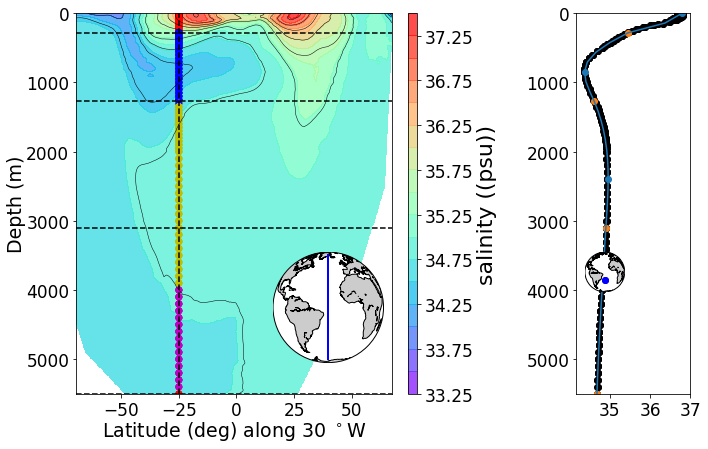

In [370]:
ptlat, ptlon = -25, -30
lineLon = -30
minLat, maxLat = -70, 70
tracer = 'salinity'

newPlot = plotRaw(['section', 'column'])
fig, ax_out = newPlot.make()

dataset = getData()
# dataset.get_plan([-70, 70],[-180, 180], [tracer], 1500)
dataset.get_section('NS_section', lineLon, [minLat, maxLat], [tracer])
# datasest.get_section('EW_section', lineLat, [minLon, maxLon], [tracer])
maxdepth = max(dataset._d)

# fig, ax_out[0] = newPlot.add_plan(fig, ax_out[0], dataset, tracer, 1500)
fig, ax_out[0] = newPlot.add_section(fig, ax_out[0], dataset, tracer)
ax_out[0].axvline(x=ptlat, color='k', linestyle='--')
ax_out[0].set_ylim([maxdepth, 0])

dataset2 = getData()
dataset2.get_column([ptlat, ptlat+2], [ptlon, ptlon+2], [tracer])
ax_out[0].scatter(np.ones(len(dataset2._d))*ptlat, dataset2._d, c = color)

fig, ax_out[1] = newPlot.add_column(fig, ax_out[1], dataset2, tracer)
ax_out[1].plot(_feat_data, _d)

# ax_out[1].plot(_d, _feat_data_prime)
# ax_out[1].plot(_d, np.zeros(len(_feat_data_prime)))
ax_out[1].scatter(_feat_data[extrema1], _d[extrema1])# np.zeros(len(extrema1))) #max and min of concentration; d/d[a] = 0
ax_out[1].scatter(_feat_data[extrema2], _d[extrema2])
ax_out[1].set_ylim([maxdepth, 0])

for extrema in extrema2:
    ax_out[0].axhline(y=_d[extrema], color='k', linestyle='--')




In [374]:
dataset2._tracer

AttributeError: 'getData' object has no attribute '_tracer'

In [385]:
class water_column():
    
    def __init__(self, dataset):
        self.char_values = []
        self.char_depths = []
        self._d_smooth = []
        self._d = dataset._d
        self._feat_data = dataset._feat_data
        self._feat_data_smooth = []
        self._feat_data_smooth_d1 = []
        self.extrema_d1 = []
        self.extrema_d2 = []
        
    def smooth_data(self):
        _d = []
        _feat_data = []

        for ik in range(len(self._d)):
            if self._d[ik] not in _d:
                _d.append(self._d[ik])
                #change this to pull the median value if there are multiple values for a given depth
                _feat_data.append(self._feat_data[ik])

        spl = UnivariateSpline(_d, _feat_data)
        spl.set_smoothing_factor(0.05)

        numpts = 40
        self._d_smooth = np.linspace(0, max(_d), num=numpts, endpoint=True)
        self._feat_data_smooth = spl(self._d_smooth)

        self._feat_data_smooth_d1 = np.gradient(self._feat_data_smooth,self._d_smooth)

    def get_char_values(self):
        if len(self._feat_data_smooth)==0:
            self.smooth_data()
            
        self.extrema_d1 = np.sort(np.concatenate([argrelextrema(self._feat_data_smooth, np.greater, mode="wrap")[0], argrelextrema(self._feat_data_smooth, np.less, mode="wrap")[0]]))
        self.extrema_d2 = np.sort(np.concatenate([argrelextrema(self._feat_data_smooth_d1, np.greater, mode="wrap")[0], argrelextrema(self._feat_data_smooth_d1, np.less, mode="wrap")[0]]))

        char_values = []
        depths = []
        for ik in range(len(self.extrema_d1)):
            depth = round(self._d_smooth[self.extrema_d1][ik],-1)
            char_value = np.mean(self._feat_data[self._d == depth])
            if (char_value >0) == False:
                depth = round(self._d_smooth[extrema1][ik] / 50.0) * 50.0
                char_value = np.mean(self._feat_data[self._d == depth])
            char_values.append(char_value)
            depths.append(depth)
            
        self.char_values = char_values
        self.char_depths = depths        

In [386]:
midlat_s = water_column(dataset2)
midlat_s.get_char_values()

4


In [334]:
dataset = getData()
dataset.return_from_psql('SELECT latitude, longitude, depth, salinity from woa13 WHERE latitude <-18 and latitude > -19 and longitude < -31 and longitude >-32 order by depth',['latitude', 'longitude', 'depth', 'salinity'], ['salinity'], 'longitude', 'latitude')

dataset2 = getData()
dataset2.return_from_psql('SELECT latitude, longitude, depth, salinity from woa13 WHERE latitude <-38 and latitude > -40 and longitude < -26 and longitude >-32 order by depth',['latitude', 'longitude', 'depth', 'salinity'], ['salinity'], 'longitude', 'latitude')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:23: SADeprecationWarning: reflect=True is deprecate; please use the reflect() method.


['salinity']
['latitude', 'longitude', 'depth', 'salinity']
['salinity']
['salinity']
['latitude', 'longitude', 'depth', 'salinity']
['salinity']


In [362]:
from scipy.interpolate import UnivariateSpline
from scipy.signal import argrelextrema

_d = []
_feat_data = []

for ik in range(len(dataset2._d)):
    if dataset2._d[ik] not in _d:
        _d.append(dataset2._d[ik])
        #change this to pull the median value if there are multiple values for a given depth
        _feat_data.append(dataset2._feat_data[ik])

spl = UnivariateSpline(_d, _feat_data)
spl.set_smoothing_factor(0.05)

numpts = 40
_d = np.linspace(0, max(_d), num=numpts, endpoint=True)
_feat_data = spl(_d)

_feat_data_prime = np.gradient(_feat_data,_d)

extrema1 = np.sort(np.concatenate([argrelextrema(_feat_data, np.greater, mode="wrap")[0], argrelextrema(_feat_data, np.less, mode="wrap")[0]]))
extrema2 = np.sort(np.concatenate([argrelextrema(_feat_data_prime, np.greater, mode="wrap")[0], argrelextrema(_feat_data_prime, np.less, mode="wrap")[0]]))


5500.0 5500.0


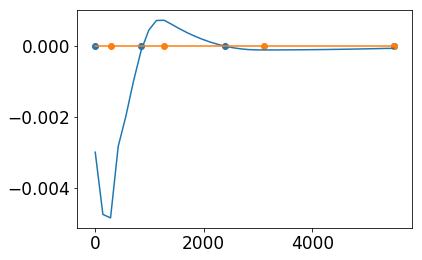

In [363]:
plt.plot(_d, _feat_data_prime)
plt.plot(_d, np.zeros(len(_feat_data_prime)))
plt.scatter(_d[extrema1], np.zeros(len(extrema1))) #max and min of concentration; d/d[a] = 0
plt.scatter(_d[extrema2], np.zeros(len(extrema2))) #max and min of rate of concentration change; d/d[a] = 0

In [364]:
# consider the water column sections as described as the depths where change is happenening slowly, are the sections distinct with 90% confidence?
data1 = dataset2._feat_data[dataset2._d>_d[extrema2][-1]]
data2 = dataset2._feat_data[(_d[extrema2][-1]>dataset2._d) &(dataset2._d >_d[extrema2][-2])]
t2, p2 = stats.ttest_ind(data1,data2, equal_var=False)
print(t2, p2)

data3 = dataset2._feat_data[(_d[extrema2][-2]>dataset2._d) &(dataset2._d >_d[extrema2][-3])]
t3, p3 = stats.ttest_ind(data2,data3, equal_var=False)
print(t3, p3)

data4 = dataset2._feat_data[(dataset2._d <_d[extrema2][-3])]
t4, p4 = stats.ttest_ind(data3,data4, equal_var=False)
print(t4, p4)

nan nan
-6.76379378562 1.56231226583e-10
-11.9328740305 1.7578582905e-25


In [365]:
extrema1

array([ 0,  6, 17, 39])

In [366]:
#characteristic values (values at depths where the concentration doesn't change):
char_values = []
depths = []
for ik in range(len(extrema1)):
    depth = round(_d[extrema1][ik],-1)
    char_value = np.mean(dataset2._feat_data[dataset2._d == depth])
    if (char_value >0) == False:
        depth = round(_d[extrema1][ik] / 50.0) * 50.0
        char_value = np.mean(dataset2._feat_data[dataset2._d == depth])
    char_values.append(char_value)
    depths.append(depth)

build a mixing model for layers on top of each other using the max and min values of the _feat_data as characteristic values.  Whichever watermass has > 50% owns the point. 

s = c1*s1 +c2*s2 
o = c1*o1 +c2*o2

solve for c1, c2

In [367]:
depths

[0.0, 850.0, 2400.0, 5500.0]

In [368]:
ik = 0
colors = [('r', 'b'), ('b', 'y'), ('y', 'm'), ('m', 'g'), ('g', 'c')]
color = []
depth = dataset._d[0]
ik = 0

# for ik in range(len(dataset._feat_data)):
for ip in range(0, len(char_values)-1):
    lower_bnd = depths[ip+1]
    u_char = char_values[ip]
    l_char = char_values[ip+1]
    while (depth < lower_bnd):
        depth = dataset2._d[ik]
        c_1 = max(min((dataset2._feat_data[ik]-l_char)/(u_char-l_char), 1), 0)
        if c_1 >= .5:
            color.append(colors[ip][0])
        else:
            color.append(colors[ip][1])
        ik+=1

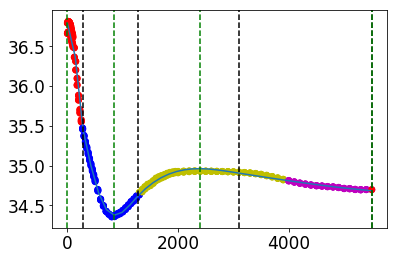

In [369]:
plt.scatter(dataset2._d, dataset2._feat_data, c=color)
plt.plot(_d, _feat_data)
for extrema in extrema2:
    plt.axvline(_d[extrema], color='k', linestyle='--')
for extrema in extrema1:
    plt.axvline(_d[extrema], color='g', linestyle='--')

In [288]:
#comparing datasets from different locations
data1 = dataset._feat_data[dataset._d>np.sort(_d[extrema2])[-1]]
data1 = dataset._feat_data[dataset._d>_d[extrema2][-1]]


data2 = dataset2._feat_data[dataset2._d>np.sort(_d[extrema2])[-1]]
print((np.mean(data1)-np.mean(data2))/(np.std(data1)**2/len(data1)+np.std(data2)**2/len(data2))**(1/2))
t2, p2 = stats.ttest_ind(data1,data2, equal_var=False)
t2, p2

0.311909901056


(0.30857520092498314, 0.75862767489261529)

KeyboardInterrupt: 

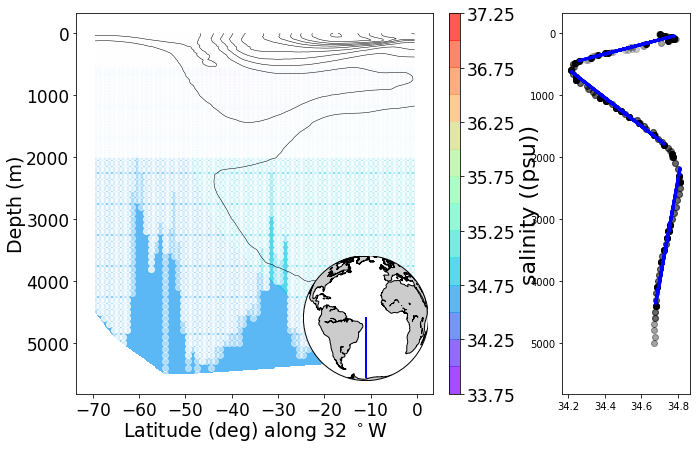

In [7]:
fig, (ax1, ax2) = oc_plt.plotRaw(minlat, maxlat, minlon, maxlon, [tracer], slice_type, add_profile = True, plot_depths= True)
_x, _y, _d, _feat_data, _basemap, _xLab, _yLab, _latLon_params = oc_data.get_column([ptlat, ptlat+2], [ptlon, ptlon+2], [tracer])
intervals, fig, ax2 = oc_an.column_split_byslope(_feat_data, _d, exist_plt = (fig, ax2), depth_lim = ax1.get_ylim())

# add annotation from profile to section plot
ax1.axvline(minlat, color='k', linestyle='--')
for depth in intervals:
    ax1.axhline(depth, color='k', linestyle='--', alpha = .5)

In [102]:
#Find depths of statistically different water masses by 1 tracer
# Assumes miniumum sample size of 200 of both samples
# starts from the bottom and if the samples between bottom bound and middle bound 
# are not statistically different from the sample between middle bound and upper bound,
# push the middle bound and upper bound up and try again
# once they are stastistically different drop the middle bound incrementally until reach the 
# depth where the p value is just less than .01
# then set bottom bound = middle bound and repeat

# kwargs: takes 'exist_plt' if this is a second plot in a fig, and 'depth_lim' in case the second plot is a section with a different minimum depth
def column_split_ptest(_feat_data2, _d, **kwargs):
    _feat_data = np.asarray(_feat_data2).reshape(-1, 1)

    sample_size = 100
    lower_bound = max(_d)
    lower_increment = 100
    n_1 = 0
    middle_bound = lower_bound - n_1*lower_increment
    upper_increment = 100
    n_2 = 0
    upper_bound = middle_bound - n_2*upper_increment

    intervals = [lower_bound]
    
    if 'exist_plt' in kwargs:
        (fig, ax) = kwargs['exist_plt']
        ax.yaxis.tick_right()
        ax.set_xlabel(fig.get_axes()[-1].get_ylabel(), fontsize=axis_sz-3, labelpad = 0)

#         ax = fig.add_subplot(222)
    else:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 7), facecolor='w')
        ax.set_ylabel('Depth (m)', fontsize=tick_sz-4)
        ax.invert_yaxis()
        
    while upper_bound >0:
        n_1 = 0
        middle_bound = lower_bound - n_1*lower_increment
        n_2 = 0
        upper_bound = middle_bound - n_2*upper_increment

        nitrate_lower = _feat_data[(_d<=lower_bound) & (_d > middle_bound)]
        print(len(nitrate_lower))
        nitrate_upper = _feat_data[(_d<=middle_bound) & (_d > upper_bound)]
        print(len(nitrate_upper))
        p2 = 1
    #     print(len(nitrate_upper))
        #split into upper and lower sections with at least 30 data points each
        while p2>.01 or len(nitrate_lower)<sample_size or len(nitrate_upper)<sample_size:
            if len(nitrate_lower) < sample_size or  p2>.01:
                n_1+=.5
                middle_bound = lower_bound - n_1*lower_increment
                print(middle_bound)
                nitrate_lower = _feat_data[(_d<=lower_bound) & (_d > middle_bound)]

                nitrate_lower = [nitrate_lower[ik][0] for ik in range(len(nitrate_lower))]

                if middle_bound - n_2*upper_increment != upper_bound:
                    n_2 = .5
                    upper_bound = middle_bound - n_2*upper_increment
                    nitrate_upper = _feat_data[(_d<=middle_bound) & (_d > upper_bound)]
                    while len(nitrate_upper) < sample_size:
                        n_2+=.5
                        upper_bound = middle_bound - n_2*upper_increment
                        nitrate_upper = _feat_data[(_d<=middle_bound) & (_d > upper_bound)]
                        print('nitrate_upper', len(nitrate_upper))
                        nitrate_upper = [nitrate_upper[ik][0] for ik in range(len(nitrate_upper))]

            # test to see if they are significantly different
            t2, p2 = stats.ttest_ind(nitrate_upper,nitrate_lower)

    #     print(t2,p2)
    #     print(lower_bound, middle_bound, upper_bound, len(nitrate_lower), len(nitrate_upper))
        intervals.append(middle_bound)
        print('intervals')
        lower_bound = middle_bound
        
    ax.scatter(_feat_data2, _d)
    for y_val in intervals:
        ax.axhline(y=y_val, color='r', linestyle='--', alpha = .4)    
    
    # set tick parameters
    xtickNames = ax.get_xticklabels()
    ytickNames = ax.get_yticklabels()
    
    for names in [ytickNames, xtickNames]:
        plt.setp(names, rotation=0, fontsize=tick_sz-4)
        
    if 'depth_lim' in kwargs:
        ax.set_ylim(kwargs['depth_lim'])
        
    return intervals, fig, ax

0
0
4450.0
nitrate_upper 2
nitrate_upper 2
nitrate_upper 5
nitrate_upper 5
nitrate_upper 9
nitrate_upper 9
nitrate_upper 13
nitrate_upper 13
nitrate_upper 17
nitrate_upper 17
nitrate_upper 21
nitrate_upper 21
nitrate_upper 25
nitrate_upper 25
nitrate_upper 29
nitrate_upper 29
nitrate_upper 33
nitrate_upper 33
nitrate_upper 37
nitrate_upper 37
nitrate_upper 41
nitrate_upper 41
nitrate_upper 45
nitrate_upper 45
nitrate_upper 49
nitrate_upper 49
nitrate_upper 53
nitrate_upper 53
nitrate_upper 57
nitrate_upper 57
nitrate_upper 61
nitrate_upper 61
nitrate_upper 65
nitrate_upper 65
nitrate_upper 69
nitrate_upper 69
nitrate_upper 73
nitrate_upper 73
nitrate_upper 77
nitrate_upper 77
nitrate_upper 81
nitrate_upper 81
nitrate_upper 85
nitrate_upper 85
nitrate_upper 89
nitrate_upper 89
nitrate_upper 93
nitrate_upper 93
nitrate_upper 97
nitrate_upper 101
4400.0
nitrate_upper 2
nitrate_upper 5
nitrate_upper 5
nitrate_upper 9
nitrate_upper 9
nitrate_upper 13
nitrate_upper 13
nitrate_upper 17
nitrat

nitrate_upper 72
nitrate_upper 76
nitrate_upper 80
nitrate_upper 84
nitrate_upper 88
nitrate_upper 92
nitrate_upper 96
nitrate_upper 100
3650.0
nitrate_upper 4
nitrate_upper 4
nitrate_upper 8
nitrate_upper 8
nitrate_upper 12
nitrate_upper 12
nitrate_upper 16
nitrate_upper 16
nitrate_upper 20
nitrate_upper 20
nitrate_upper 24
nitrate_upper 24
nitrate_upper 28
nitrate_upper 28
nitrate_upper 32
nitrate_upper 32
nitrate_upper 36
nitrate_upper 36
nitrate_upper 40
nitrate_upper 40
nitrate_upper 44
nitrate_upper 44
nitrate_upper 48
nitrate_upper 48
nitrate_upper 52
nitrate_upper 52
nitrate_upper 56
nitrate_upper 56
nitrate_upper 60
nitrate_upper 60
nitrate_upper 64
nitrate_upper 64
nitrate_upper 68
nitrate_upper 72
nitrate_upper 76
nitrate_upper 80
nitrate_upper 84
nitrate_upper 88
nitrate_upper 92
nitrate_upper 96
nitrate_upper 100
3600.0
nitrate_upper 4
nitrate_upper 8
nitrate_upper 8
nitrate_upper 12
nitrate_upper 12
nitrate_upper 16
nitrate_upper 16
nitrate_upper 20
nitrate_upper 20
nitra

nitrate_upper 96
nitrate_upper 100
2650.0
nitrate_upper 4
nitrate_upper 4
nitrate_upper 8
nitrate_upper 8
nitrate_upper 12
nitrate_upper 12
nitrate_upper 16
nitrate_upper 16
nitrate_upper 20
nitrate_upper 20
nitrate_upper 24
nitrate_upper 24
nitrate_upper 28
nitrate_upper 32
nitrate_upper 36
nitrate_upper 40
nitrate_upper 44
nitrate_upper 48
nitrate_upper 52
nitrate_upper 56
nitrate_upper 60
nitrate_upper 64
nitrate_upper 68
nitrate_upper 72
nitrate_upper 76
nitrate_upper 80
nitrate_upper 84
nitrate_upper 88
nitrate_upper 92
nitrate_upper 96
nitrate_upper 100
2600.0
nitrate_upper 4
nitrate_upper 8
nitrate_upper 8
nitrate_upper 12
nitrate_upper 12
nitrate_upper 16
nitrate_upper 16
nitrate_upper 20
nitrate_upper 20
nitrate_upper 24
nitrate_upper 24
nitrate_upper 28
nitrate_upper 32
nitrate_upper 36
nitrate_upper 40
nitrate_upper 44
nitrate_upper 48
nitrate_upper 52
nitrate_upper 56
nitrate_upper 60
nitrate_upper 64
nitrate_upper 68
nitrate_upper 72
nitrate_upper 76
nitrate_upper 80
nitra

1200.0
nitrate_upper 8
nitrate_upper 12
nitrate_upper 16
nitrate_upper 20
nitrate_upper 24
nitrate_upper 28
nitrate_upper 32
nitrate_upper 36
nitrate_upper 40
nitrate_upper 44
nitrate_upper 48
nitrate_upper 52
nitrate_upper 56
nitrate_upper 64
nitrate_upper 72
nitrate_upper 80
nitrate_upper 88
nitrate_upper 96
nitrate_upper 104
1150.0
nitrate_upper 8
nitrate_upper 12
nitrate_upper 16
nitrate_upper 20
nitrate_upper 24
nitrate_upper 28
nitrate_upper 32
nitrate_upper 36
nitrate_upper 40
nitrate_upper 44
nitrate_upper 48
nitrate_upper 52
nitrate_upper 60
nitrate_upper 68
nitrate_upper 76
nitrate_upper 84
nitrate_upper 92
nitrate_upper 100
1100.0
nitrate_upper 8
nitrate_upper 12
nitrate_upper 16
nitrate_upper 20
nitrate_upper 24
nitrate_upper 28
nitrate_upper 32
nitrate_upper 36
nitrate_upper 40
nitrate_upper 44
nitrate_upper 48
nitrate_upper 56
nitrate_upper 64
nitrate_upper 72
nitrate_upper 80
nitrate_upper 88
nitrate_upper 96
nitrate_upper 104
1050.0
nitrate_upper 8
nitrate_upper 12
nitr

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 92
nitrate_upper 

KeyboardInterrupt: 

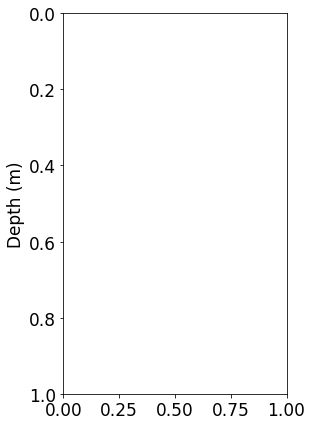

In [103]:
intervals, fig, ax = column_split_ptest(dataset._feat_data, dataset._d)